### PART-I

**1. Import required libraries and read the dataset.**

In [595]:
import math
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer 
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [596]:
data = pd.read_csv("Apps_data+(1).csv")

In [597]:
data1 = data.copy()

Here the the required libraries are imported.

**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [598]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [599]:
data1.shape

(10841, 13)

In [600]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Here we can see the information about the dataset. 

Here we can see that the dataset have 10841 rows and 13 columns. 

The datatypes are also shown above. dtypes: float64(1), object(12).

The memory used by the dataset is 1.1+ MB.

In [601]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.**

In [602]:
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [603]:
data1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [604]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The columns that need to be worked upon for model building are Reviews, Rating, Price, Size & Installs.

Their data types must be changed.

**4. Check if there are any duplicate records in the dataset? if any drop them.**

In [605]:
data1.duplicated().sum()

483

483 duplicates

In [606]:
data1.drop_duplicates(inplace = True)
data1.duplicated().sum()

0

**5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [607]:
data1.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

Above data shows the unique categories of the dataset.
Category has 34 unique categories.

In [608]:
data1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [609]:
row_index = data1[data1['Category'] == '1.9' ].index
print(row_index)

Int64Index([10472], dtype='int64')


In [610]:
data1.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [611]:
data1 = data1.drop(10472)
data1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Dropped the invalid category "1.9".

**6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).**

In [612]:
data1.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Rating has 1465 missing values.

In [613]:
data1.dropna(inplace=True)

In [614]:
data1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [615]:
data1['Rating_category'] = data['Rating'].apply(lambda x: 1 if x > 3.5 else 0)
data1['Rating_category'].value_counts()

1    8007
0     879
Name: Rating_category, dtype: int64

Rating : >3.5 is converted into high(1) and the rest is converted into low(0).

High = 1 and Low = 0

**7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

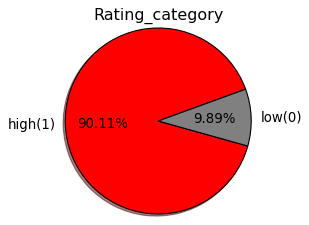

In [616]:
df = data1['Rating_category'].value_counts()
my_colors= 'red','grey'
my_labels = 'high(1)', 'low(0)'
plt.figure(figsize=(3, 3), facecolor='white') 
plt.pie(df, labels = my_labels, startangle=20, autopct='%.2f%%', colors = my_colors, shadow=True )
plt.title('Rating_category')
plt.axis('equal')
plt.show()

Here we can see that, in the total dataset 90.11% have high ratings and 9.89% have low ratings

**8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation).**

In [617]:
data1['Reviews'] = data1['Reviews'].astype(float)
data1['Reviews'].dtypes

dtype('float64')

Converted the data type from object to float.

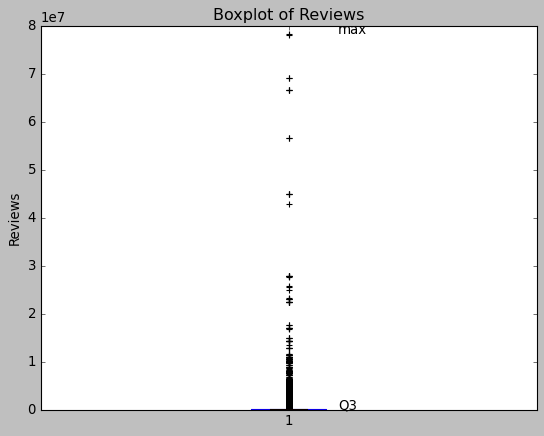

In [618]:
plt.boxplot(data1['Reviews'])
#plt.text(x = 1.1, y = data1['Reviews'].min(), s ='min')
#plt.text(x = 1.1, y = data1.Reviews.quantile(0.25), s ='Q1')
#plt.text(x = 1.1, y = data1['Reviews'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = data1.Reviews.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = data1['Reviews'].max(), s ='max')

plt.title('Boxplot of Reviews')
plt.ylabel('Reviews')
plt.show()

The number of outliers is very high.

In [619]:
data1['Reviews'].describe()

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [620]:
log_transformer = FunctionTransformer(np.log1p)
log_transformer

FunctionTransformer(func=<ufunc 'log1p'>)

In [621]:
data1['Reviews_logtransform'] = log_transformer.fit_transform(data1[['Reviews']])
data1['Reviews_logtransform'].head()

0     5.075174
1     6.875232
2    11.379520
3    12.281389
4     6.875232
Name: Reviews_logtransform, dtype: float64

In [622]:
data1['Reviews_logtransform'].describe()

count    8886.000000
mean        8.260331
std         3.839831
min         0.693147
25%         5.105945
50%         8.460411
75%        11.174851
max        18.174247
Name: Reviews_logtransform, dtype: float64

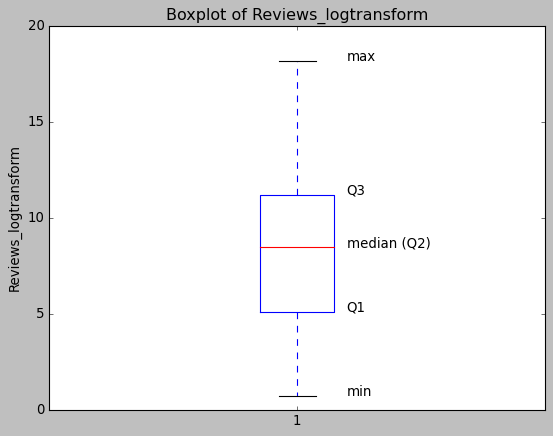

In [623]:
plt.boxplot(data1['Reviews_logtransform'])
plt.text(x = 1.1, y = data1['Reviews_logtransform'].min(), s ='min')
plt.text(x = 1.1, y = data1.Reviews_logtransform.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = data1['Reviews_logtransform'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = data1.Reviews_logtransform.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = data1['Reviews_logtransform'].max(), s ='max')

plt.title('Boxplot of Reviews_logtransform')
plt.ylabel('Reviews_logtransform')
plt.show()

After using log transformation we can say that the outliers has been removed. 

**9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device').**

In [624]:
data1[data1['Size']=='Varies with device'].value_counts().sum()

1468

Size have 1468 entries as "Varies with device".

In [625]:
data1['Size no'] = data1.loc[data1['Size'] =='Varies with device' ] = np.NaN
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_logtransform,Size no
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,5.075174,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,6.875232,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0,11.379520,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0,12.281389,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0,6.875232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,1.0,2.079442,NaN
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1.0,3.663562,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1.0,1.609438,NaN
10839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [626]:
data1.drop(['Size no'], axis=1, inplace=True)
data1.dropna(inplace=True)
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_logtransform
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0,6.875232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,1.0,3.806662
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,1.0,2.079442
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1.0,3.663562
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1.0,1.609438


Here we changed the "Varies with device" entire rows to NaN and then we removed it using drop function.

In [627]:
data1['Size'] = data1['Size'].replace({"k":"*1e3","M":"*1e6"},regex=True).map(pd.eval).astype(float)

In [628]:
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_logtransform
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0,6.875232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,1.0,3.806662
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,1.0,2.079442
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1.0,3.663562
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1.0,1.609438


Here we replaced M with 1 million and k with 1 thousand.

**10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [629]:
data1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [630]:
data1['Installs'] = data1['Installs'].str.replace('+', '')
data1['Installs'] = data1['Installs'].str.replace(',', '')
data1['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [631]:
data1['Installs'] = data1['Installs'].astype(float)
data1['Installs'].dtypes

dtype('float64')

The unwanted characters are replaced using replace function and then the datatype is changed into float.

**11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [632]:
data1['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [633]:
data1['Price'] = data1['Price'].str.replace('$', '')
data1['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [634]:
data1['Price'] = data1['Price'].astype(float)
data1['Price'].dtypes

dtype('float64')

The unwanted characters are replaced using replace function and then the datatype is changed into float.

**12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis).**

In [635]:
data2=data1.copy()
data2.dtypes

App                      object
Category                 object
Rating                  float64
Reviews                 float64
Size                    float64
Installs                float64
Type                     object
Price                   float64
Content Rating           object
Genres                   object
Last Updated             object
Current Ver              object
Android Ver              object
Rating_category         float64
Reviews_logtransform    float64
dtype: object

In [636]:
data2.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'], axis=1, inplace=True)
data2

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_logtransform
0,ART_AND_DESIGN,159.0,19000000.0,10000.0,Free,0.0,Everyone,1.0,5.075174
1,ART_AND_DESIGN,967.0,14000000.0,500000.0,Free,0.0,Everyone,1.0,6.875232
2,ART_AND_DESIGN,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,1.0,11.379520
3,ART_AND_DESIGN,215644.0,25000000.0,50000000.0,Free,0.0,Teen,1.0,12.281389
4,ART_AND_DESIGN,967.0,2800000.0,100000.0,Free,0.0,Everyone,1.0,6.875232
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.0,619000.0,1000.0,Free,0.0,Everyone,1.0,3.806662
10834,FAMILY,7.0,2600000.0,500.0,Free,0.0,Everyone,1.0,2.079442
10836,FAMILY,38.0,53000000.0,5000.0,Free,0.0,Everyone,1.0,3.663562
10837,FAMILY,4.0,3600000.0,100.0,Free,0.0,Everyone,1.0,1.609438


Dropped all the columns that are redundant for further analysis.

**13. Encode the categorical columns.**

In [637]:
data2['Category'].value_counts()

FAMILY                 1590
GAME                    959
TOOLS                   633
PERSONALIZATION         277
MEDICAL                 277
LIFESTYLE               273
FINANCE                 263
SPORTS                  232
PRODUCTIVITY            231
BUSINESS                225
PHOTOGRAPHY             225
COMMUNICATION           206
HEALTH_AND_FITNESS      199
SOCIAL                  170
NEWS_AND_MAGAZINES      162
SHOPPING                159
TRAVEL_AND_LOCAL        147
BOOKS_AND_REFERENCE     143
DATING                  141
VIDEO_PLAYERS           116
MAPS_AND_NAVIGATION      95
EDUCATION                95
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
WEATHER                  51
HOUSE_AND_HOME           50
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [638]:
data2['Content Rating'].value_counts()

Everyone           5952
Teen                832
Mature 17+          332
Everyone 10+        299
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [639]:
data2['Type'].value_counts()

Free    6873
Paid     545
Name: Type, dtype: int64

In [640]:
data2.dtypes

Category                 object
Reviews                 float64
Size                    float64
Installs                float64
Type                     object
Price                   float64
Content Rating           object
Rating_category         float64
Reviews_logtransform    float64
dtype: object

In [641]:
data2['Type'] = data2['Type'].str.replace('Free', '0')
data2['Type'] = data2['Type'].str.replace('Paid', '1')
data2['Type'] = data2['Type'].astype(int)
data2['Type'].value_counts()

0    6873
1     545
Name: Type, dtype: int64

Type : Paid and Free is converted into 1 and 0 

Paid = 1 and Free = 0

In [642]:
data2= pd.get_dummies(data2, prefix='Category', columns=['Category'])

In [643]:
data2= pd.get_dummies(data2, prefix='Content Rating', columns=['Content Rating'])

In [644]:
data2

,Reviews,Size,Installs,Type,Price,Rating_category,Reviews_logtransform,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,19000000.0,10000.0,0,0.0,1.0,5.075174,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967.0,14000000.0,500000.0,0,0.0,1.0,6.875232,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510.0,8700000.0,5000000.0,0,0.0,1.0,11.379520,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,215644.0,25000000.0,50000000.0,0,0.0,1.0,12.281389,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,967.0,2800000.0,100000.0,0,0.0,1.0,6.875232,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44.0,619000.0,1000.0,0,0.0,1.0,3.806662,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,7.0,2600000.0,500.0,0,0.0,1.0,2.079442,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,38.0,53000000.0,5000.0,0,0.0,1.0,3.663562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,4.0,3600000.0,100.0,0,0.0,1.0,1.609438,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Encoding of the categorical variables are completed.

**14. Segregate the target and independent features (Hint: Use Rating_category as the target).**

In [645]:
X = data2.drop('Rating_category',axis=1)
Y = data2['Rating_category']

In [646]:
X

,Reviews,Size,Installs,Type,Price,Reviews_logtransform,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,19000000.0,10000.0,0,0.0,5.075174,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967.0,14000000.0,500000.0,0,0.0,6.875232,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510.0,8700000.0,5000000.0,0,0.0,11.379520,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,215644.0,25000000.0,50000000.0,0,0.0,12.281389,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,967.0,2800000.0,100000.0,0,0.0,6.875232,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44.0,619000.0,1000.0,0,0.0,3.806662,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10834,7.0,2600000.0,500.0,0,0.0,2.079442,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,38.0,53000000.0,5000.0,0,0.0,3.663562,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,4.0,3600000.0,100.0,0,0.0,1.609438,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [647]:
Y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10833    1.0
10834    1.0
10836    1.0
10837    1.0
10840    1.0
Name: Rating_category, Length: 7418, dtype: float64

Segregated the target and independent variables

**15. Split the dataset into train and test.**

In [648]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5192, 45) (2226, 45)
(5192,) (2226,)


Here we can see that the dataset is splitted into train and test data.

**16. Standardize the data, so that the values are within a particular range.**

In [649]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [650]:
X_train = std_scale.fit_transform(X_train)
X_train

array([[-0.15658408, -0.87682273, -0.17188352, ..., -0.21676088,
        -0.35668664, -0.01387952],
       [-0.07935868, -0.85960764,  0.08166257, ..., -0.21676088,
        -0.35668664, -0.01387952],
       [-0.1359399 , -0.82087369, -0.14653119, ..., -0.21676088,
        -0.35668664, -0.01387952],
       ...,
       [-0.05442231,  0.65962401, -0.04511174, ..., -0.21676088,
         2.80358133, -0.01387952],
       [-0.15465698, -0.65302657, -0.16935057, ..., -0.21676088,
        -0.35668664, -0.01387952],
       [-0.15656373, -0.64011525, -0.17175928, ..., -0.21676088,
        -0.35668664, -0.01387952]])

In [651]:
X_test = std_scale.fit_transform(X_test)
X_test

array([[-0.16870207, -0.88132482, -0.17344475, ...,  4.63517513,
        -0.35248039,  0.        ],
       [-0.16871157, -0.74325736, -0.17344475, ..., -0.21574158,
        -0.35248039,  0.        ],
       [-0.16792442, -0.81019916, -0.17177442, ..., -0.21574158,
        -0.35248039,  0.        ],
       ...,
       [-0.10656897, -0.93174036, -0.00474113, ..., -0.21574158,
        -0.35248039,  0.        ],
       [-0.16866409, -0.24956159, -0.17344475, ..., -0.21574158,
        -0.35248039,  0.        ],
       [-0.16865509,  2.05156276, -0.17261802, ..., -0.21574158,
        -0.35248039,  0.        ]])

Standardization of the train and test data are completed using Standard Scaler.